In [90]:
# %pip install seaborn
%pip install plot-keras-history


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.39-py3-none-any.whl size=10795 sha256=ebcd0bacca3620e67eb9778a15daf79490c510490f554527dd331a5e1d6cbb1f
  Stored in directory: c:\users\manon\appdata\local\pip\cache\wheels\56\8d\d7\bd70289b1bd192664225cd608fd08437ecc725c3f8918383d9
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.1.4-py3-none-any.whl size=324405 sha256=156d345e7cf0ce5aeae0b428884d9548e19d2f8b1835518e46204cdd0210a69b
  Stored in directory: c:\users\manon\appdata\local\pip\cache\wheels\ed\32\52\40db53b628215fe3c4fe7d0b0fe1decfd67ccccc91118df507
  Created wheel for compress-json: filename=compress_json-1.1.1-py3-none-any.whl size=

  DEPRECATION: Building 'plot-keras-history' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'plot-keras-history'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'sanitize_ml_labels' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'sanitize_ml_labels'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'compress-json' 

# Test de faisabilité de clsutering via un CNN Transfert Learning

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

from sklearn import metrics




## Préparation du modèle et des données

In [3]:
# Chargement des données
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')

image_files = [f"{id}.jpg" for id in text_df['uniq_id']]
image_folder = r"Dataset_projet_pretraitement_textes_images\Flipkart\Images"
image_paths = [os.path.join(image_folder, f) for f in image_files]
images = [load_img(path, target_size=(224, 224)) for path in image_paths]

c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [4]:
print(len(images), "images loaded.")

1050 images loaded.


In [5]:
model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [7]:
feature_list=[]
for image in images:
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    features = model.predict(image)
    feature_list.append(features.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
feature_list_np = np.array(feature_list)

feature_list_np.shape

(1050, 4096)

## Analyse de la faisabilité de la custerisation

In [9]:
pca_cnn = PCA(n_components=0.99)
pca_cnn_hist = pca_cnn.fit_transform(feature_list_np)
print("Variance expliquée :", pca_cnn.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_cnn.explained_variance_ratio_.sum())

Variance expliquée : [8.03090334e-02 6.49624243e-02 4.98068109e-02 3.55147272e-02
 3.22152413e-02 2.43258178e-02 2.26224493e-02 1.90314185e-02
 1.78794488e-02 1.60854552e-02 1.43922232e-02 1.30916703e-02
 1.26115130e-02 1.21222800e-02 1.06803384e-02 1.04935896e-02
 9.98682342e-03 9.53355059e-03 9.28869937e-03 9.09049530e-03
 8.32357723e-03 8.27639829e-03 7.90925696e-03 7.66737806e-03
 7.20114587e-03 6.76153740e-03 6.63224608e-03 6.38302136e-03
 6.06768345e-03 5.79403900e-03 5.61683159e-03 5.49101504e-03
 5.31094940e-03 5.05054696e-03 4.97796573e-03 4.88931267e-03
 4.77951393e-03 4.71780403e-03 4.57257219e-03 4.48458223e-03
 4.32016095e-03 4.18919418e-03 4.03924286e-03 3.97604378e-03
 3.78463254e-03 3.75075312e-03 3.62254935e-03 3.59187112e-03
 3.46525898e-03 3.35227116e-03 3.29618901e-03 3.28520685e-03
 3.16739525e-03 3.08685261e-03 3.02608148e-03 2.98892846e-03
 2.94440147e-03 2.87263282e-03 2.81688408e-03 2.76917941e-03
 2.71668495e-03 2.68482557e-03 2.61935662e-03 2.55792309e-03
 2.

In [10]:
print(f"Dimensions après réduction par l'ACP : {pca_cnn_hist.shape}")

Dimensions après réduction par l'ACP : (1050, 803)


In [11]:
df_cnn = pd.DataFrame(feature_list_np)
print(df_cnn.head())

       0         1     2         3         4        5         6     7     \
0  3.398614  0.859573   0.0  1.106563  2.266121  2.92724  2.446446   0.0   
1  0.000000  0.000000   0.0  1.172007  0.000000  0.00000  0.000000   0.0   
2  0.000000  0.000000   0.0  4.457804  0.000000  0.00000  0.000000   0.0   
3  0.000000  0.070992   0.0  2.046282  0.000000  0.00000  0.000000   0.0   
4  3.417155  0.000000   0.0  0.000000  1.012357  0.00000  0.000000   0.0   

   8         9     ...      4086  4087  4088      4089      4090      4091  \
0   0.0  0.000000  ...  0.485878   0.0   0.0  0.472935  0.875755  0.783683   
1   0.0  6.499795  ...  1.169692   0.0   0.0  0.000000  0.000000  3.152507   
2   0.0  2.820564  ...  0.000000   0.0   0.0  0.000000  0.000000  5.270281   
3   0.0  0.894020  ...  0.000000   0.0   0.0  0.000000  0.000000  3.977749   
4   0.0  0.000000  ...  0.000000   0.0   0.0  0.000000  0.000000  9.195918   

       4092      4093      4094  4095  
0  0.000000  0.000000  0.851055   

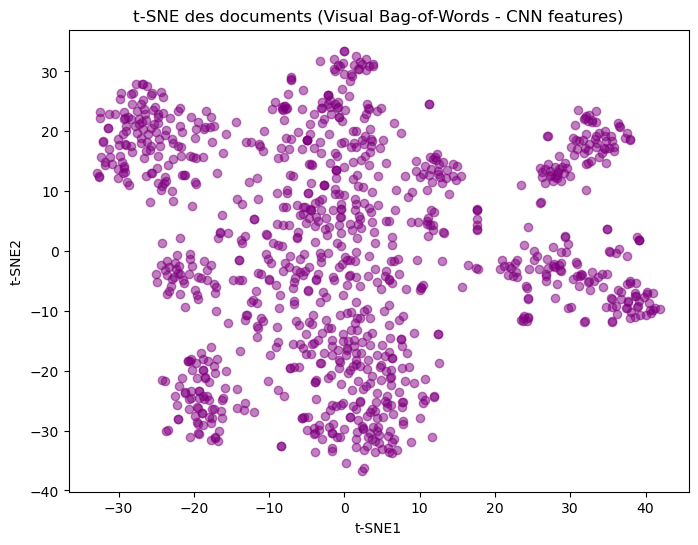

In [12]:
tsne_cnn = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_cnn_hist = tsne_cnn.fit_transform(pca_cnn_hist)

df_cnn['TSNE1_cnn'] = tsne_cnn_hist[:, 0]
df_cnn['TSNE2_cnn'] = tsne_cnn_hist[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Visual Bag-of-Words - CNN features)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [13]:
def _normalize_cat_str(x):
    if pd.isna(x):
        return ""
    if isinstance(x, list):
        s = " ".join(map(str, x))
    else:
        s = str(x).strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    s = " ".join(map(str, parsed))
            except Exception:
                pass
    s = s.replace("&gt;", ">>").replace("&amp;", "&")
    return s.strip(" []'\"")

def _split_levels(s):
    if not s:
        return []
    if ">>" in s:
        parts = [p.strip() for p in s.split(">>") if p.strip()]
    else:
        parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
    return parts

def extract_first_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[0] if parts else np.nan

text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)


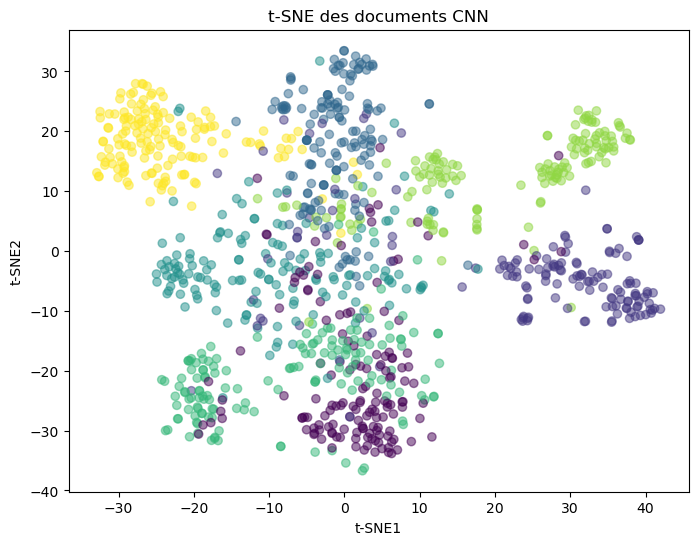

In [14]:
#Pour visualiser suivant les vraies catégories
df_cnn['categories'] = text_df['categories']
df_cnn['cat_code'] = df_cnn['categories'].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cat_code'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [15]:
X_cnn = df_cnn[['TSNE1_cnn', 'TSNE2_cnn']]

kmeans_cnn = KMeans(n_clusters=7, random_state=42)
kmeans_cnn.fit(X_cnn)
df_cnn['cluster_cnn'] = kmeans_cnn.labels_

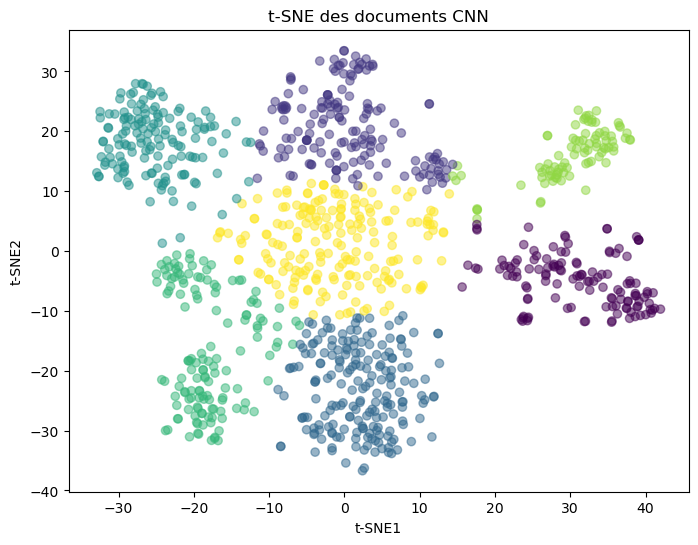

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cluster_cnn'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [17]:
ari_cnn = adjusted_rand_score(df_cnn['cluster_cnn'], df_cnn['cat_code'])
print(f"ARI = {ari_cnn:.3f}")

ARI = 0.461


Le clustering semble bien meilleur avec ce modèle. La classification automatique semble possible en utilisant cette méthode.

In [18]:
df_cnn['categories'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [19]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"
list_error_0 = [i for i in range(len(df_cnn)) \
                if (df_cnn.iloc[i]['categories']=='Baby Care') and (df_cnn.iloc[i]['cluster_cnn']==6)]
idx = list_error_0[0]
idx

79

In [20]:
df_cnn.head()

,0,1,2,3,4,5,6,7,8,9,...,4091,4092,4093,4094,4095,TSNE1_cnn,TSNE2_cnn,categories,cat_code,cluster_cnn
0,3.398614,0.859573,0.0,1.106563,2.266121,2.92724,2.446446,0.0,0.0,0.000000,...,0.783683,0.000000,0.000000,0.851055,0.0,-18.525324,-20.979872,Home Furnishing,4,4
1,0.000000,0.000000,0.0,1.172007,0.000000,0.00000,0.000000,0.0,0.0,6.499795,...,3.152507,0.000000,0.000000,0.000000,0.0,-3.177719,-18.743793,Baby Care,0,2
2,0.000000,0.000000,0.0,4.457804,0.000000,0.00000,0.000000,0.0,0.0,2.820564,...,5.270281,0.000000,1.297103,0.000000,0.0,2.129972,-19.221941,Baby Care,0,2
3,0.000000,0.070992,0.0,2.046282,0.000000,0.00000,0.000000,0.0,0.0,0.894020,...,3.977749,0.000000,0.000000,0.000000,0.0,-14.315367,-26.283751,Home Furnishing,4,4
4,3.417155,0.000000,0.0,0.000000,1.012357,0.00000,0.000000,0.0,0.0,0.000000,...,9.195918,0.139735,0.000000,1.735954,0.0,-22.091469,-28.021040,Home Furnishing,4,4


In [21]:
# image_file = f"{df_cnn.loc[idx]}.jpg"
# filename = os.path.join(image_folder, image_file)

# # Charger et afficher
# image = imread(filename)
# imshow(image)
# show()

# Ne fonctionne pas

In [22]:
conf_mat = metrics.confusion_matrix(df_cnn['cluster_cnn'], df_cnn['cat_code'])
print(conf_mat)

[[  3 117   1   1   0   6   0]
 [  2   7 109   3   0  26  13]
 [109   4   1   2  79   1   0]
 [  0   1   1   8   0   0 135]
 [  9   6   0  57  67   0   0]
 [  1   1   0   0   0  86   0]
 [ 26  14  38  79   4  31   2]]


In [23]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [24]:
cls_labels_transform = conf_mat_transform(df_cnn['cluster_cnn'], df_cnn['cat_code'])
conf_mat = metrics.confusion_matrix(df_cnn['cluster_cnn'], cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(df_cnn['cluster_cnn'], cls_labels_transform))

Correspondance des clusters :  [2 0 1 6 2 5 3]
[[117   1   3   0   0   6   1]
 [  7 109   2  13   0  26   3]
 [  4   1 188   0   0   1   2]
 [  1   1   0 135   0   0   8]
 [  6   0  76   0   0   0  57]
 [  1   0   1   0   0  86   0]
 [ 14  38  30   2   0  31  79]]

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       128
           1       0.73      0.68      0.70       160
           2       0.63      0.96      0.76       196
           3       0.90      0.93      0.92       145
           4       0.00      0.00      0.00       139
           5       0.57      0.98      0.72        88
           6       0.53      0.41      0.46       194

    accuracy                           0.68      1050
   macro avg       0.59      0.70      0.63      1050
weighted avg       0.59      0.68      0.62      1050



c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

<Axes: >

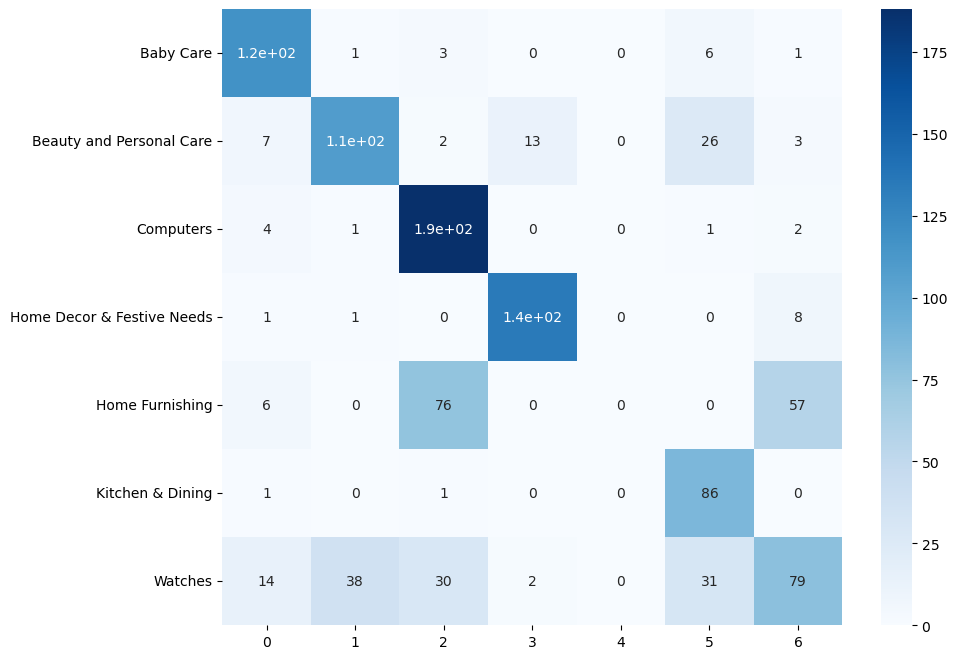

In [25]:
df_cm = pd.DataFrame(conf_mat, index = sorted([label for label in df_cnn['categories'].unique()]),
                  columns = [i for i in [0,1,2,3,4,5,6]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, cmap="Blues")

Les montres sont les moins bien prédites. 

## Classification supervisée

In [91]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.utils import to_categorical
from plot_keras_history import show_history, plot_history
  


In [73]:
model_list=[]
for image in images:
    image = img_to_array(image)
    image = preprocess_input(image)
    model_list.append(image)

In [74]:
# df_model = pd.DataFrame(model_list)
# df_model['categories'] = text_df['categories']
text_df['cat_code'] = text_df['categories'].astype('category').cat.codes

In [75]:
mapping = (
    text_df[['categories', 'cat_code']]
    .drop_duplicates()
    .sort_values('cat_code')
)

print(mapping)

                    categories  cat_code
1                    Baby Care         0
43    Beauty and Personal Care         1
47                   Computers         2
36  Home Decor & Festive Needs         3
0              Home Furnishing         4
37            Kitchen & Dining         5
5                      Watches         6


In [76]:
for category in text_df['categories'].unique():
    count = sum(text_df['categories'] == category)
    print(f"{category}: {count} images")

Home Furnishing: 150 images
Baby Care: 150 images
Watches: 150 images
Home Decor & Festive Needs: 150 images
Kitchen & Dining: 150 images
Beauty and Personal Care: 150 images
Computers: 150 images


In [77]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x) #softmax est un bon algorithme quan don a un équilibre des classes, ce qui est le cas ici

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [78]:
X = np.array(model_list)
X

array([[[[  88.061     ,   87.221     ,   82.32      ],
         [  87.061     ,   86.221     ,   81.32      ],
         [  89.061     ,   85.221     ,   81.32      ],
         ...,
         [  53.060997  ,   49.221     ,   51.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  53.060997  ,   49.221     ,   51.32      ]],

        [[  99.061     ,   91.221     ,   83.32      ],
         [  97.061     ,   89.221     ,   83.32      ],
         [  98.061     ,   90.221     ,   84.32      ],
         ...,
         [  56.060997  ,   52.221     ,   54.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  55.060997  ,   51.221     ,   53.32      ]],

        [[  99.061     ,   90.221     ,   84.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         ...,
         [  55.060997  ,   51.221     ,   53.32      ],
         [  56.060997  ,   52.221     ,   54.32      ],
  

In [79]:
X.shape

(1050, 224, 224, 3)

In [81]:
y = to_categorical(text_df['cat_code'], num_classes=7) #one hot encoder
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(1050, 7))

In [82]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42,
    stratify=y   # pour garder les proportions des classes 
)
X_trainval.shape

(840, 224, 224, 3)

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, test_size=0.25, random_state=42)
X_train.shape

(630, 224, 224, 3)

In [84]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [85]:
# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

In [ ]:
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3257 - loss: 8.1977 
Epoch 1: val_loss improved from None to 1.50299, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 152s 15s/step - accuracy: 0.4460 - loss: 5.5845 - val_accuracy: 0.7429 - val_loss: 1.5030
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6533 - loss: 2.1870 
Epoch 2: val_loss improved from 1.50299 to 1.34902, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 137s 14s/step - accuracy: 0.6794 - loss: 2.1300 - val_accuracy: 0.7667 - val_loss: 1.3490
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7583 - loss: 1.4308
Epoch 3: val_loss improved from 1.34902 to 1.32090, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 131s 13s/step - accuracy: 0.7556 - loss: 1.2989 - val_accuracy: 0.7810 - val_loss: 1.3209
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7764 - loss: 1.1995 
Epoch 4: val_loss improved from 1.32090 to 1.12667, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 134s 14s/step - accuracy: 0.7889 - loss: 1.0052 - val_accuracy: 0.7810 - val_loss: 1.1267
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8127 - loss: 0.7414
Epoch 5: val_loss improved from 1.12667 to 1.09650, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 131s 13s/step - accuracy: 0.8206 - loss: 0.7426 - val_accuracy: 0.7905 - val_loss: 1.0965
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8477 - loss: 0.5085 
Epoch 6: val_loss improved from 1.09650 to 1.01264, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 14s/step - accuracy: 0.8460 - loss: 0.5471 - val_accuracy: 0.8143 - val_loss: 1.0126
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8799 - loss: 0.4516
Epoch 7: val_loss improved from 1.01264 to 0.98564, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 138s 13s/step - accuracy: 0.8794 - loss: 0.4636 - val_accuracy: 0.8095 - val_loss: 0.9856
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8959 - loss: 0.2748 
Epoch 8: val_loss did not improve from 0.98564
10/10 ━━━━━━━━━━━━━━━━━━━━ 131s 13s/step - accuracy: 0.9063 - loss: 0.2471 - val_accuracy: 0.7952 - val_loss: 1.0332
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9482 - loss: 0.2005 
Epoch 9: val_loss did not improve from 0.98564
10/10 ━━━━━━━━━━━━━━━━━━━━ 126s 13s/step - accuracy: 0.9206 - loss: 0.2581 - val_accuracy: 0.8000 - val_loss: 1.0632
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9516 - loss: 0.1883
Epoch 10: val_loss did not improve from 0.98564
10/10 ━━━━━━━━━━━━━━━━━━━━ 134s 14s/step - accuracy: 0.9302 - loss: 0.2422 - val_accuracy: 0.8190 - val_loss: 1.0119
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9532 - loss: 0.1439 
Epoch 11: val_loss did not improve from 0.98564
10

In [ ]:
#Score du dernier Epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9984 - loss: 0.0167
Training Accuracy: 0.9984

7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7762 - loss: 1.1345
Validation Accuracy:  0.7762


In [88]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8095
Test Accuracy       :  0.8095


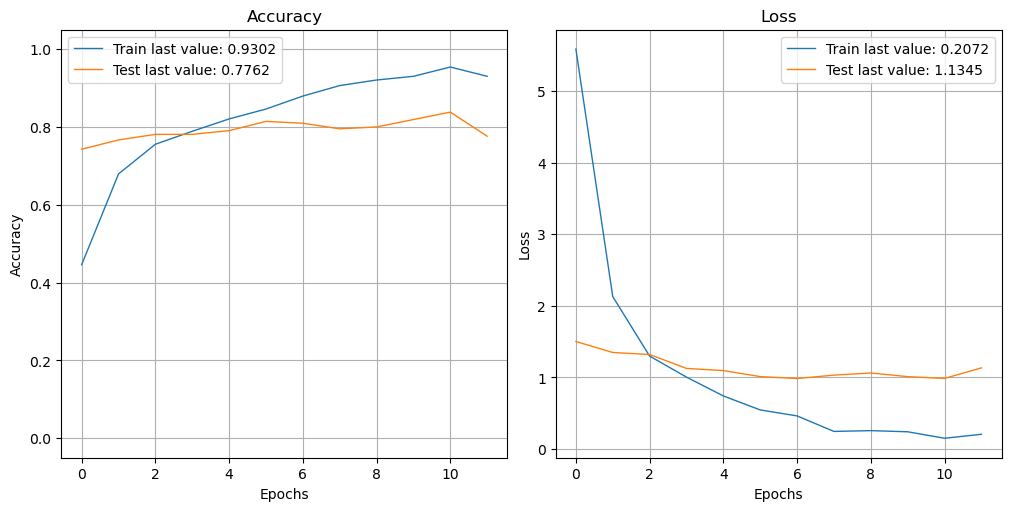

In [92]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [ ]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step
[0 2 6 2 4 1 1 0 2 4 2 6 1 6 5 2 1 1 4 3 4 2 6 6 3 3 0 1 2 4 6 3 4 2 6 5 2
 5 6 3 0 2 6 5 2 0 1 6 4 6 5 3 3 3 5 3 5 4 4 0 4 0 6 6 2 5 0 0 1 3 5 3 5 1
 4 6 2 4 5 1 4 0 5 4 1 5 2 2 3 1 3 5 4 3 5 4 6 0 2 0 3 4 5 1 3 3 6 1 1 4 3
 0 3 2 5 2 1 6 1 4 5 5 3 0 0 3 2 6 3 6 5 1 2 6 6 1 1 5 3 4 3 3 5 1 0 4 5 0
 5 4 0 6 0 0 4 0 2 4 1 2 4 0 5 2 4 1 5 2 4 1 0 2 1 6 4 2 4 3 0 0 6 2 0 4 6
 5 0 2 3 1 6 0 6 1 5 0 5 0 2 3 1 6 1 2 1 3 6 3 6 5]

[0 5 6 3 4 1 4 5 2 4 2 6 1 6 1 2 1 1 4 3 4 2 6 6 3 3 0 1 2 4 6 3 4 2 6 3 2
 5 5 6 1 0 6 5 2 0 1 6 4 6 5 3 3 1 5 4 5 1 4 4 4 0 6 6 2 5 0 4 1 2 5 2 5 1
 4 6 2 4 5 4 4 0 5 4 1 5 2 2 3 1 3 5 4 3 5 4 6 0 2 0 3 4 5 1 2 3 3 2 1 4 3
 4 3 2 5 2 5 6 1 4 5 0 3 0 0 3 2 6 3 6 5 1 2 6 6 1 2 5 5 0 3 3 5 1 0 4 5 0
 5 4 0 6 4 0 0 0 2 3 5 2 4 0 5 5 4 1 4 2 1 1 0 6 1 6 0 2 4 3 0 0 6 2 4 4 6
 5 4 2 3 1 6 0 6 1 5 0 5 0 2 3 3 6 1 1 1 3 6 3 6 5]


In [94]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[22  1  0  0  6  1  0]
 [ 0 23  2  1  2  2  0]
 [ 1  1 24  1  0  2  1]
 [ 0  1  3 23  1  1  1]
 [ 3  2  0  1 24  0  0]
 [ 1  1  0  1  1 26  0]
 [ 0  0  0  1  0  1 28]]


In [95]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[22  1  0  0  6  1  0]
 [ 0 23  2  1  2  2  0]
 [ 1  1 24  1  0  2  1]
 [ 0  1  3 23  1  1  1]
 [ 3  2  0  1 24  0  0]
 [ 1  1  0  1  1 26  0]
 [ 0  0  0  1  0  1 28]]

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.79      0.77      0.78        30
           2       0.83      0.80      0.81        30
           3       0.82      0.77      0.79        30
           4       0.71      0.80      0.75        30
           5       0.79      0.87      0.83        30
           6       0.93      0.93      0.93        30

    accuracy                           0.81       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.81      0.81      0.81       210



In [106]:
mapping

,categories,cat_code
1,Baby Care,0
43,Beauty and Personal Care,1
47,Computers,2
36,Home Decor & Festive Needs,3
0,Home Furnishing,4
37,Kitchen & Dining,5
5,Watches,6


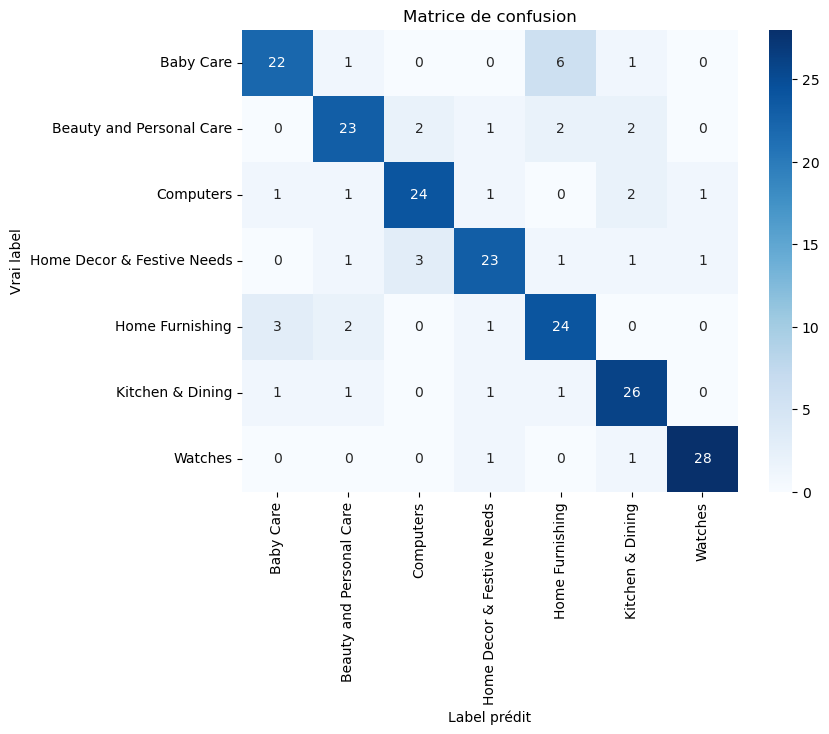

In [ ]:
from sklearn.metrics import confusion_matrix

# 1. Crée un mapping catégorie -> cat_code entier
mapping = dict(zip(df_cnn['categories'], df_cnn['cat_code'].astype(int)))

# 2. Trie les catégories selon leur code
sorted_items = sorted(mapping.items(), key=lambda item: item[1])
categories_names = [k for k, v in sorted_items]

# 3. Calcul de la confusion matrix
conf_mat = confusion_matrix(y_val_num, y_val_pred_transform)  

# 4. Transforme en DataFrame pour seaborn
df_cm = pd.DataFrame(conf_mat, index=categories_names, columns=categories_names)

# 5. Affiche la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.title('Matrice de confusion')
plt.show()


Il y a moins d'erreur d'attribution de label. 